In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [5]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [7]:
data.shape

(1111742, 30)

In [11]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [15]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [16]:
data[data["winPlacePerc"].isnull()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [17]:
data["winPlacePerc"] = data["winPlacePerc"].fillna(np.mean(data["winPlacePerc"]))
data[data["winPlacePerc"].isnull()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [18]:
data.skew()

Unnamed: 0          0.000003
assists             3.608622
boosts              1.953292
damageDealt         3.014093
DBNOs               3.185760
headshotKills       6.048764
heals               3.476639
killPlace           0.027635
killPoints          0.520990
kills               3.452266
killStreaks         1.286748
longestKill         3.999413
matchDuration       0.274046
maxPlace            1.354716
numGroups           1.361751
rankPoints         -0.367622
revives             4.018129
rideDistance        3.335737
roadKills          35.613026
swimDistance       13.988223
teamKills           8.174814
vehicleDestroys    12.744544
walkDistance        1.091027
weaponsAcquired     2.609852
winPoints           0.407401
winPlacePerc        0.098283
dtype: float64

In [19]:
data.kurtosis()

Unnamed: 0           -1.201103
assists              21.796652
boosts                4.315384
damageDealt          21.441811
DBNOs                21.499852
headshotKills       195.621011
heals                19.498255
killPlace            -1.184863
killPoints           -1.559758
kills                30.707200
killStreaks           2.788812
longestKill          25.412510
matchDuration        -1.255459
maxPlace              0.488157
numGroups             0.537757
rankPoints           -1.800895
revives              36.461919
rideDistance         14.295050
roadKills          2628.263567
swimDistance        346.205853
teamKills            89.672993
vehicleDestroys     190.139282
walkDistance          0.942376
weaponsAcquired      55.587503
winPoints            -1.823766
winPlacePerc         -1.245227
dtype: float64

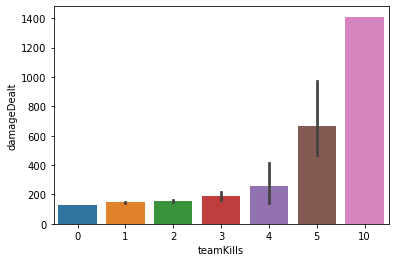

In [20]:
sns.barplot(x = data.teamKills,y = data.damageDealt)

In [21]:
data['vehicleDestroys'].value_counts()

0    1103376
1       8054
2        285
3         24
4          2
5          1
Name: vehicleDestroys, dtype: int64

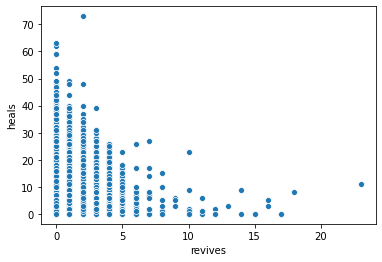

In [22]:
sns.scatterplot(y = data.heals,x = data.revives)

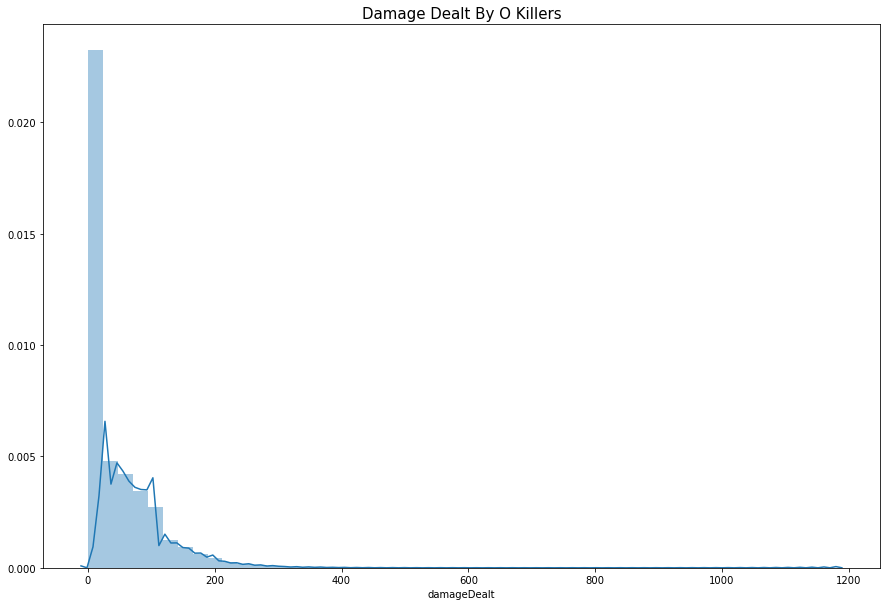

In [23]:
df=data.copy()
df=  df[df['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt By O Killers',fontsize=15)
sns.distplot(df['damageDealt'])
plt.show()

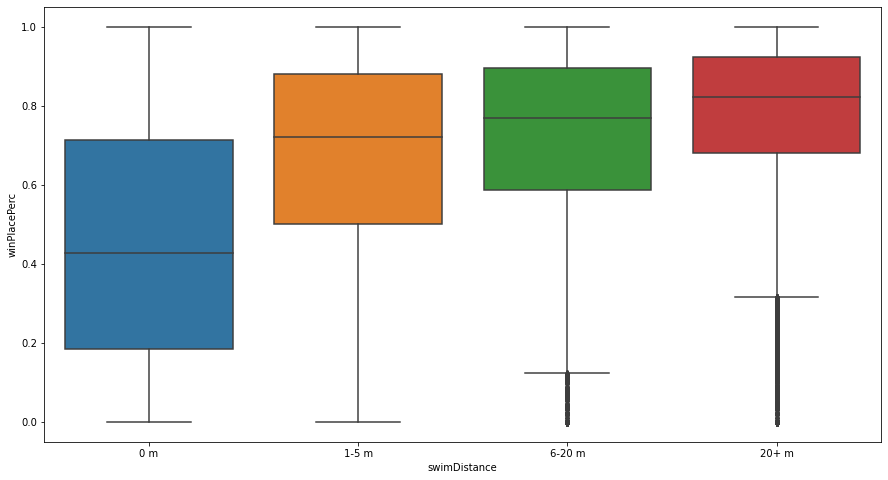

In [24]:
swim = data.copy()
swim['swimDistance']= pd.cut(swim['swimDistance'],[-1,0,5,20,5286],labels=['0 m','1-5 m','6-20 m','20+ m'])
plt.figure(figsize=(15,8))
sns.boxplot(data=swim, x='swimDistance',y='winPlacePerc')
plt.show()

In [25]:
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Quantity (million)")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

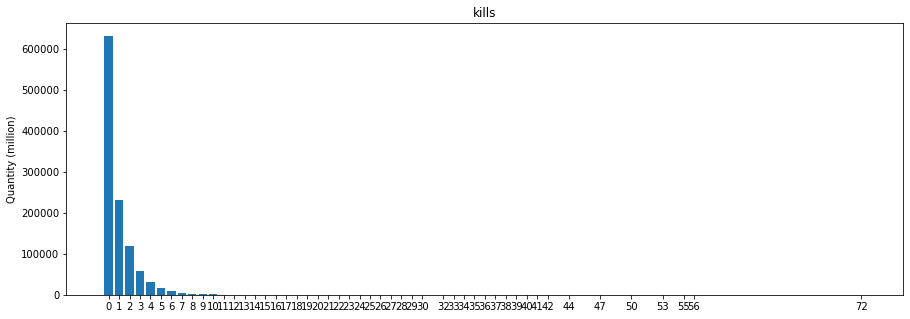

kills: 
 0     632149
1     232156
2     118274
3      58026
4      31302
5      16600
6       9429
7       5458
8       3139
9       1934
10      1131
11       713
12       451
13       283
14       199
15       126
16        78
17        61
18        53
19        29
21        27
20        24
22        22
23        17
24        11
26         9
30         5
33         3
27         3
40         3
38         3
25         3
36         2
39         2
37         2
29         2
47         1
50         1
42         1
53         1
55         1
44         1
56         1
41         1
35         1
34         1
32         1
28         1
72         1
Name: kills, dtype: int64


In [26]:
bar_plot('kills')

In [27]:
len(data[(data.kills == 0) & (data.winPlacePerc == 1)])
len(data[(data.kills == 0) & (data.winPlacePerc == 1) & (data.numGroups > 50)])

3

In [28]:
data.sort_values(by=['kills'], ascending=False).head(5)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
758017,3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,...,0,0.0,0,0.0,0,0,728.10,35,0,1.0
697393,1491277,1f6ceaa5140fb6,dc2fef63e14d5c,f900de1ec39fa5,15,0,5468.0,0,13,5,...,0,3492.0,0,0.0,0,0,1059.00,60,0,0.9
1036315,770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,...,0,0.0,0,0.0,0,0,85.55,66,0,1.0
349163,2929506,97047ef60af1e7,f02fdd0b3071d3,5921b55b9e96b5,11,0,5520.0,0,8,4,...,0,1645.0,0,0.0,0,0,1045.00,57,0,1.0
521514,1454065,c47bd86daa3de6,4df3e348b910d8,3ebf1bf8bc6bae,2,2,4495.0,0,42,2,...,0,0.0,0,0.0,0,0,1021.00,15,1500,1.0


In [29]:
print("{:.2f}% of kills are headshot kills.".format(data.headshotKills.sum()/data.kills.sum() * 100))


24.49% of kills are headshot kills.


In [30]:
data[data.headshotKills == 1]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
43,3067187,f9970ab7f174a3,cb3f0e187cee01,6e823d01a4c3c8,0,0,100.0,0,1,2,...,0,0.0,0,0.0,0,0,1116.0,4,1494,0.6701
48,451501,69cc179102b606,419f789692c3cf,a262e09ae21743,0,5,653.3,5,1,9,...,2,424.8,0,176.0,0,0,2999.0,6,1563,0.8148
51,1884016,f786731466d1ad,ea7356d48f0299,5f48fae9849f6a,0,7,407.1,3,1,3,...,0,4700.0,0,0.0,0,0,3444.0,6,1499,1.0000
54,2758270,561ef4973111ac,2ca5f2aad62180,cbc498c72bc773,1,0,198.0,1,1,1,...,0,0.0,0,0.0,0,0,130.5,1,1570,0.2400
66,3803963,dc07834c180bde,f7b9330fd1132c,f7318414d63a90,1,2,247.4,1,1,3,...,2,0.0,0,0.0,0,0,2619.0,5,0,0.8148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111713,2760844,79c80a1d10c430,74b2bce81c3bc5,088a24aefbaec6,1,4,449.8,3,1,7,...,0,0.0,0,0.0,0,0,2966.0,7,0,0.9630
1111717,1676427,f5c0468c4866d5,7cccd055ffaefe,072c16df049d48,1,3,367.4,1,1,2,...,1,0.0,0,0.0,0,0,3271.0,7,1577,1.0000
1111722,619954,90ce43c21ca401,fe3297fddbfa32,91aa551b4b76a6,0,3,432.5,1,1,5,...,0,2734.0,0,152.3,0,0,2512.0,5,0,0.9167
1111723,2925622,992ffcec71aaa0,e96faa66efd3aa,ec2e688f651285,0,0,157.0,1,1,0,...,0,0.0,0,0.0,0,0,224.5,2,0,0.2041


In [31]:
def plot_hist(data, variable):
    plt.figure(figsize = (10,5))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Quantity (million)")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

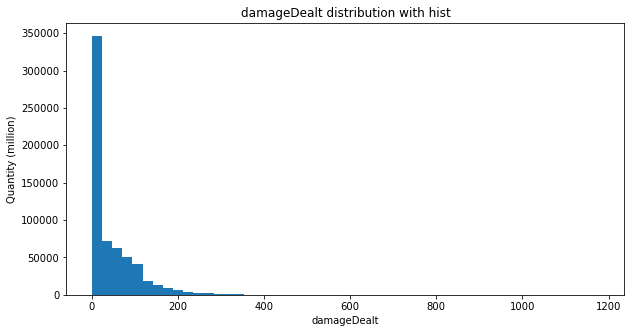

In [32]:
plot_hist(data[data.kills == 0], "damageDealt")

In [33]:
len(data[(data.damageDealt == 0) & (data.kills == 0)])


308383

In [34]:
len(data[(data["weaponsAcquired"] == 0) & (data.damageDealt == 0) & (data.kills == 0)])
data[(data["weaponsAcquired"] == 0) & (data.damageDealt == 0) & (data.kills == 0)].winPlacePerc.mean()

0.0881822563261156

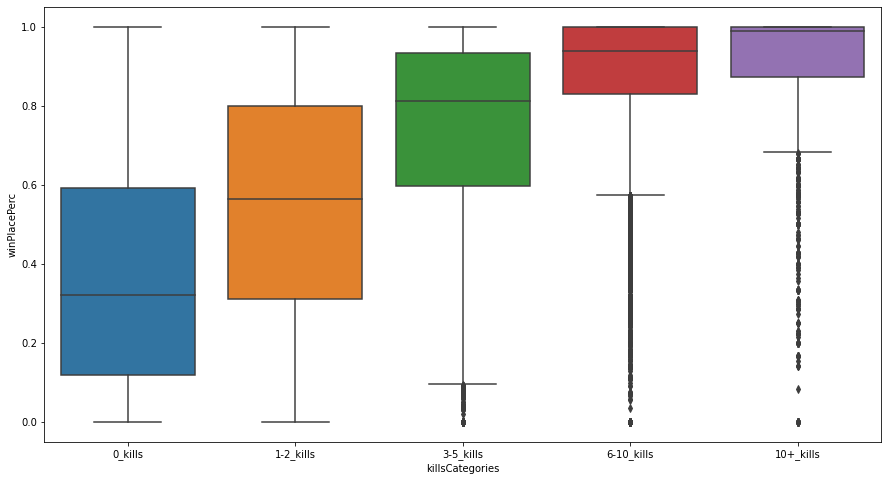

In [35]:
kills = data.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

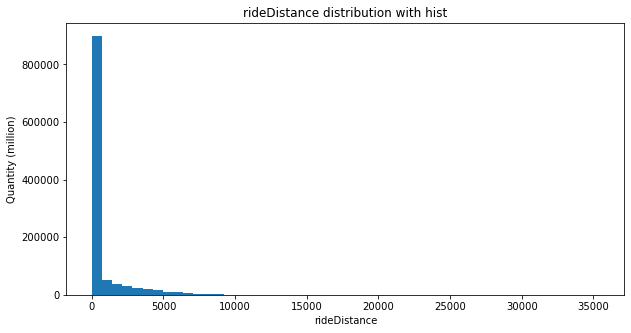

In [36]:
plot_hist(data, "rideDistance")

In [37]:
print("{:.2f}% of the players did not drive.".format(len(data[data.rideDistance == 0])/len(data) * 100.0))
print("The average person drives for {:.2f}.".format(data.rideDistance.mean()))

74.44% of the players did not drive.
The average person drives for 604.21.


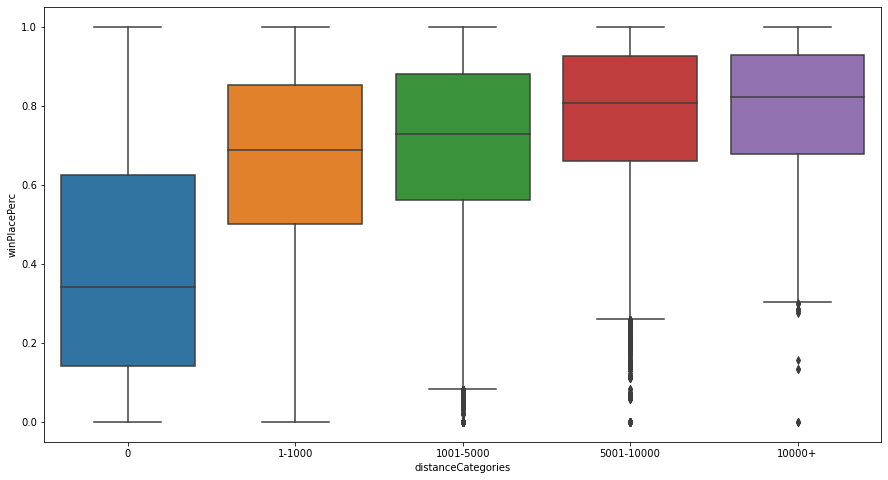

In [38]:
distances = data.copy()

distances['distanceCategories'] = pd.cut(distances['rideDistance'], [-1, 0, 1000, 5000, 10000, 50000], labels=['0','1-1000', '1001-5000', '5001-10000', '10000+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="distanceCategories", y="winPlacePerc", data=distances)
plt.show()

In [39]:
print("average winPlacePerc of the top 5 drivers is {}".format(data.sort_values(by=['rideDistance'], ascending=False).head(5).winPlacePerc.mean()))
data.sort_values(by=['rideDistance'], ascending=False).head(5)

average winPlacePerc of the top 5 drivers is 0.87386


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
394263,1361247,f09d0c99127850,4ca387960d74a7,93aa204e9c193e,0,2,265.60,0,0,4,...,0,35400.0,0,0.000,0,0,1912.0,7,1538,1.0000
52359,1585310,6c74f0dc7ac84f,1c93cb47629ceb,8b6f5afa8efc1b,1,1,97.47,0,0,2,...,0,29430.0,0,0.000,0,0,608.0,4,1484,0.8617
327814,3666833,30b291c24dfdc0,17b5ec0d605e73,a2bcdefa900c16,1,0,20.36,0,0,0,...,0,28550.0,0,0.000,0,0,179.0,0,1500,0.6632
1062569,3331208,540bc6487d2365,94e5295e2656a6,8600c2672192e8,0,3,31.99,0,0,2,...,0,27410.0,0,0.000,0,0,1970.0,3,1497,0.8444
801350,3837860,9d0b5863b94a5f,a638267a816c63,ab3c20a0ff2918,0,3,300.00,0,0,6,...,0,27350.0,0,6.248,0,0,623.6,7,0,1.0000


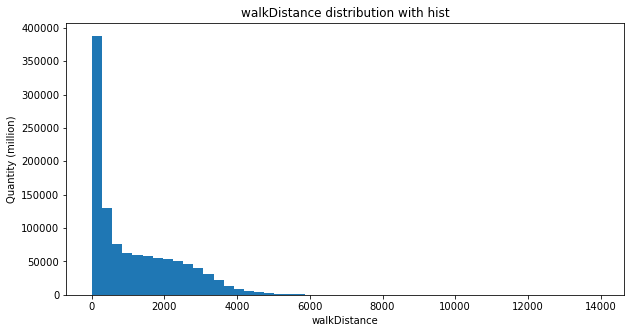

max walking distance is 13960.0


In [40]:
plot_hist(data, "walkDistance")
print("max walking distance is {}".format(data.walkDistance.max()))

In [41]:
data1 = data[(data['kills']== 3) | (data['kills']== 4) |(data['kills']== 5) ]
data2 = data1[['winPlacePerc']]

In [42]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [43]:
import random
samples = random.sample(range(0, data2.shape[0]), 100)
sample_mean = data2.iloc[samples, 0].mean()
print(sample_mean)

0.7266219999999999


In [44]:
std = data['winPlacePerc'].std()
print(std)

0.3073770038081635


In [45]:
from scipy.stats import norm
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

1.6448536269514722


In [46]:
sample_size = 100
sample_mean = sample_mean
pop_mean = data2['winPlacePerc'].mean()
pop_std = std
print(pop_mean)

0.7428983998565725


In [47]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

-0.5295256201641819


Text(0.7266219999999999, 0.0007, 'x_bar')

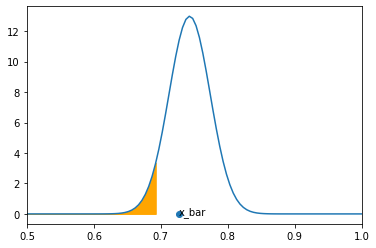

In [48]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 0.5
x_max = 1


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left critical value (left tailed Test)
z_critical_left = pop_mean - (z_critical * std)


# Shading the left rejection region
x2 = np.linspace(x_min, z_critical_left, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [49]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [50]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.5964408764811235
Fail to reject Null Hypothesis


### by the above hypothesis testing we have done states that more than three kills can say the player having win oppurnity.